In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Cargar los datos
df = pd.read_csv("datos.csv", parse_dates=True)
columnaDatos = df['value']
columnaFechas = df['timestamp']

# Convertir a array y reshape para Isolation Forest
X = columnaDatos.values.reshape(-1, 1)
X

array([[69.88083514],
       [71.22022706],
       [70.87780496],
       ...,
       [72.04656545],
       [71.82522648],
       [72.58408858]])

In [3]:
# Configurar y entrenar Isolation Forest
clf = IsolationForest(contamination=0.01, random_state=0)  # Ajusta contamination según tu tolerancia a anomalías
clf.fit(X)

# Predecir anomalías
y_pred = clf.predict(X)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [4]:
# Convertir a booleanos para anomalías (1: normal, -1: anómalo)
anomalies = y_pred == -1

# Imprimir anomalías y diferencias de valores
for index, is_anomaly in enumerate(anomalies):
    if is_anomaly:
        fecha = columnaFechas[index]
        valor = columnaDatos[index]
        print(f"Fecha: {fecha}, Valor: {valor} - Anomalía detectada")

# Resumen de las anomalías
print(f"El número de anomalías es {np.sum(anomalies)} sobre {df.shape[0]}")

Fecha: 2013-12-21 20:00:00, Valor: 82.28923988 - Anomalía detectada
Fecha: 2013-12-21 21:00:00, Valor: 82.98986906 - Anomalía detectada
Fecha: 2013-12-21 22:00:00, Valor: 83.24788623 - Anomalía detectada
Fecha: 2013-12-21 23:00:00, Valor: 82.51965884 - Anomalía detectada
Fecha: 2013-12-22 00:00:00, Valor: 82.73680192 - Anomalía detectada
Fecha: 2013-12-22 01:00:00, Valor: 83.78099481 - Anomalía detectada
Fecha: 2013-12-22 02:00:00, Valor: 83.00863385 - Anomalía detectada
Fecha: 2013-12-22 03:00:00, Valor: 82.8156272 - Anomalía detectada
Fecha: 2013-12-22 04:00:00, Valor: 81.77474405 - Anomalía detectada
Fecha: 2013-12-22 05:00:00, Valor: 82.45427776 - Anomalía detectada
Fecha: 2013-12-22 06:00:00, Valor: 82.09190101 - Anomalía detectada
Fecha: 2013-12-22 07:00:00, Valor: 80.96998612 - Anomalía detectada
Fecha: 2013-12-22 08:00:00, Valor: 81.84802474 - Anomalía detectada
Fecha: 2013-12-22 09:00:00, Valor: 82.11075802 - Anomalía detectada
Fecha: 2013-12-22 10:00:00, Valor: 80.90724311 - 

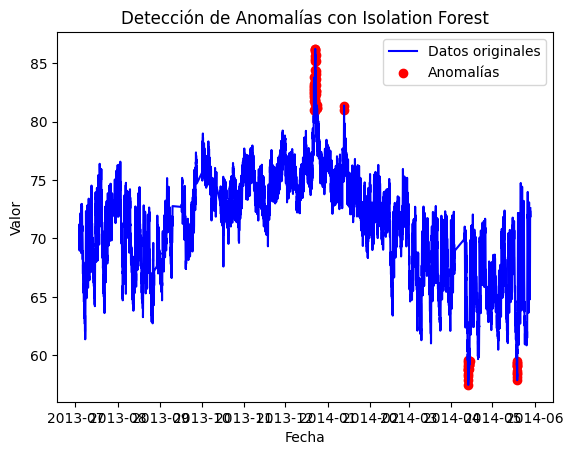

In [5]:
# Visualización
columnaFechas = pd.to_datetime(columnaFechas)
plt.plot(columnaFechas, columnaDatos, color='blue', label='Datos originales')
plt.scatter(columnaFechas[anomalies], columnaDatos[anomalies], color='red', label='Anomalías')
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Detección de Anomalías con Isolation Forest")
plt.legend()
plt.show()